# Thoracic Surgery for Lung Cancer -- 1 year patient survival prediction

-------

<div>
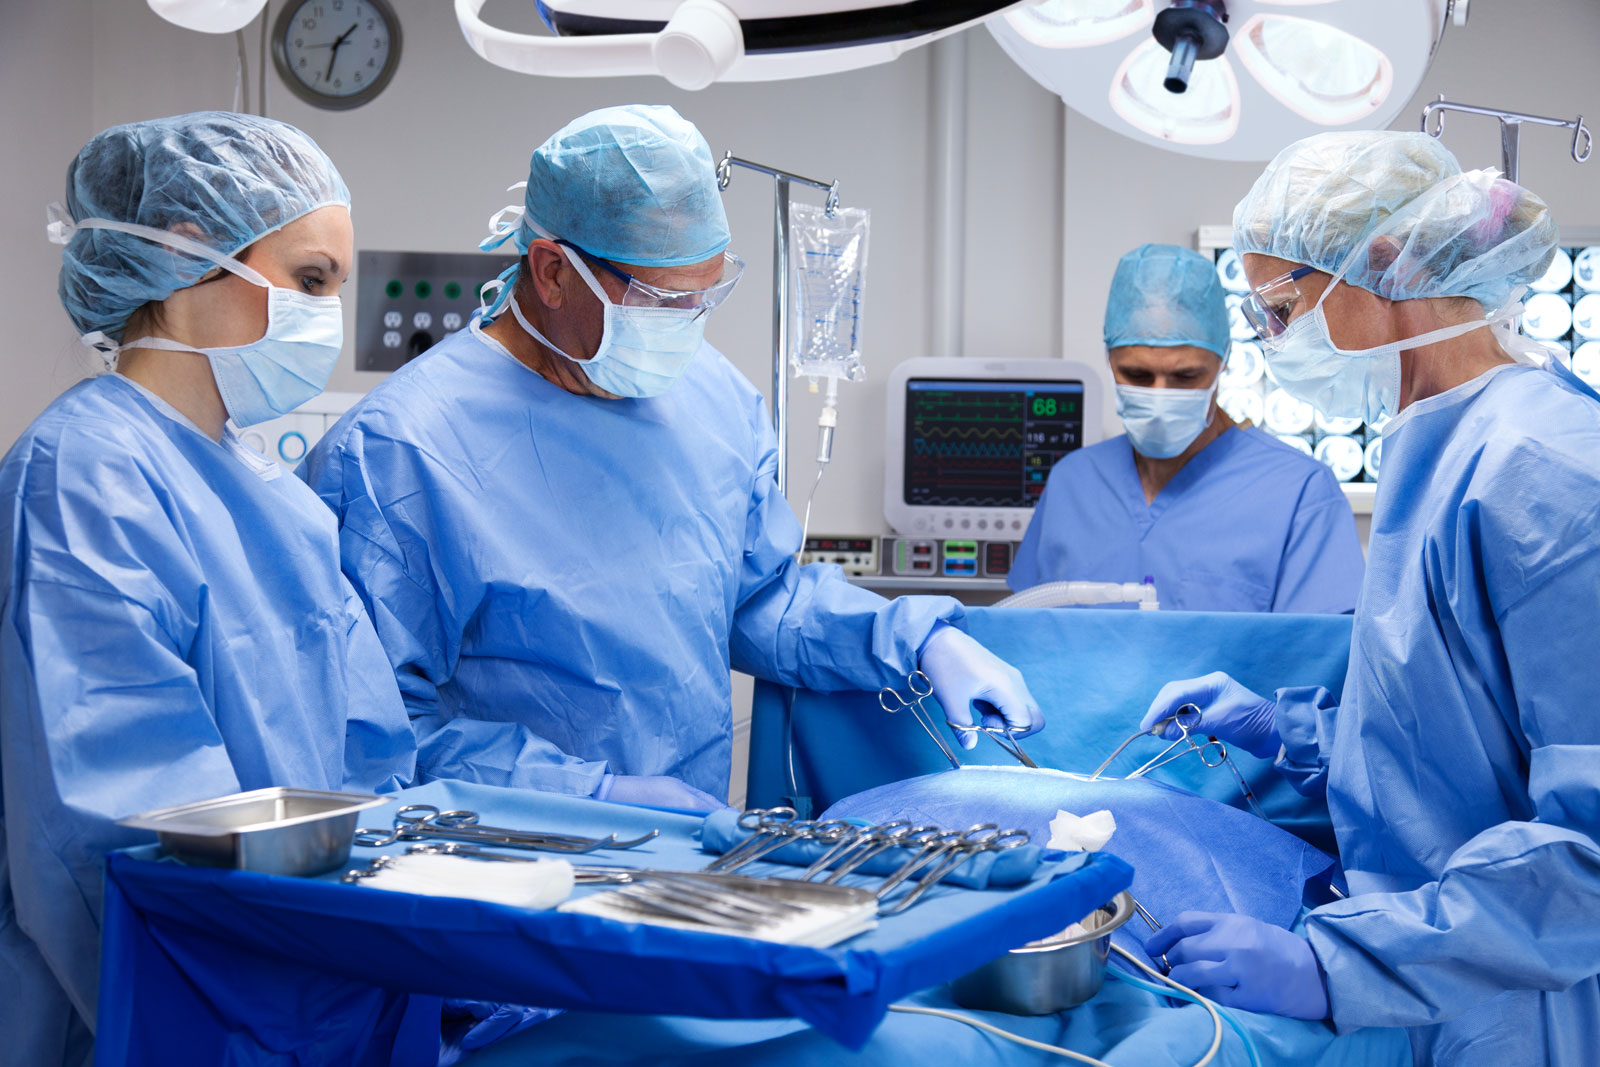
</div>

Lung Cancer remains the most commonly diagnosed cancer and the leading cause of cancer death, worldwide. In 2018 alone, new cases globally exceeded 2.1 million and 1.8 million succumbed to the disease <sup>1</sup>. 

It is estimated that in the United States, 1 in 16 people will be diagnosed with lung cancer in their lifetime. With an estimated 228,820 new dignoses in 2020 -- distributed roughly equal among both genders <sup>2</sup>. 

However, advances in screening coupled with innovative therapys and surgical techniques have drastically improved mortality rates over the last 30 years.

Thoracic surgery remains the preferred treatment for most forms of localized lung cancers, as it has a relatively high 5 year survival rate (57%) <sup>2</sup>. 

The success of the procedure, and the patient's post-operative prognosis, is largely dependent on their overall health and the condition of their lungs prior to going under the knife. 

While a number of patient metrics are evaluated, the current 'gold standard' are the patient's Forced Expiratory Volume in 1 second (FEV1) and Forced Vital Capacity (FVC). As usful as these tests are, there is at-present no definative threshold which can say with certainty whether a patient will have a positive or negative outcome from the surgical procedure. 

The GOAL of this analysis is see if there are other factors that can be used, either separately or in conjunction with FEV1/FVC, in predicting whether a certain lung cancer patient will have a higher chance at survivability post-surgery. 

### Works Cited

1. “Lung Cancer.” The Cancer Atlas, canceratlas.cancer.org/the-burden/lung-cancer/. 

2. “Lung Cancer Fact Sheet.” American Lung Association, 2020, www.lung.org/lung-health-diseases/lung-disease-lookup/lung-cancer/resource-library/lung-cancer-fact-sheet. 

-----

# Data Set Information

<div>
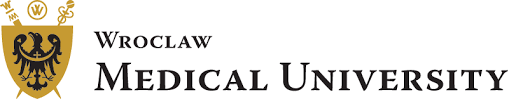
</div>

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007 to 2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.

The actual data file was obtained through the UCI Machine Learning Repository ([Thoracic_Data_Set](http://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data#))

----

| <b> Attribute </b> | <b> Description </b> | <b> Values </b> | <b> Data Type </b> | 
| --- | --- | :-: | --- |
| <b> DGN </b> | ICD-10 codes for primary and secondary as well multiple tumours if any | DGN3,DGN4,DGN5,DGN6,DGN8 | Nominal |
| <b> PRE4 </b> | Forced Vital Capacity - FVC | Numeric | Numeric |
| <b> PRE5 </b> | Forced Expiratory Volume 1s | Numeric | Numeric | 
| <b> PRE6 </b> | Performance status - Zubrod scale | PRZ0, PRZ1, PRZ2 | Nominal |
| <b> PRE7 </b> | Pain before surgery | T,F | Binary |
| <b> PRE8 </b> | Haemoptysis before surgery | T,F | Binary |
| <b> PRE9 </b> | Dyspnoea before surgery | T,F | Binary |
| <b> PRE10 </b> | Cough before surgery | T,F | Binary |
| <b> PRE11 </b>| Weakness before surgery | T,F | Binary |
| <b> PRE14 </b> | Size of the original tumour | OC11,OC12,OC13,OC14 (sm - lg) | Nominal |
| <b> PRE17 </b> | Type 2 Diabetes Mellitus | T,F | Binary |
| <b> PRE19 </b> | MI up to 6 months | T,F | Binary |
| <b> PRE25 </b> | Peripheral arterial disease (PAD) | T,F | Binary |
| <b> PRE30 </b> | Smoking | T,F | Binary |
| <b> PRE32 </b> | Asthma | T,F | Binary |
| <b> AGE </b> | Age at surgery | Numeric | Numeric |
| <b> Risk1Yr </b> | 1 year survival period | True, if died | Binary |

---

## Importing and cleaning the data

In [1]:
# Import appropriate libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
%matplotlib inline

In [2]:
# Importing and reading in the data

data = arff.loadarff('../Springboard/CAPSTONE/Data/ThoracicSurgery.arff')
df = pd.DataFrame(data[0])

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


In [3]:
# Checking column headers

df.columns

Index(['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [4]:
# Observing the shape of the data

df.shape

(470, 17)

In [5]:
# Function to decode the data (remove the byte info 'b')

def apply_decode(df_name):
    for col_name in df_name.columns:
        if df_name[col_name].dtype != 'float64':
            df_name[col_name] = df_name[col_name].apply(lambda col: col.decode('utf-8'))
    return df_name

In [6]:
# Apply decoding to data 

apply_decode(df)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60.0,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51.0,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59.0,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54.0,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63.0,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61.0,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52.0,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79.0,F


In [7]:
# Replace the Boolean values with T=1 , F=0

df.replace('F', 0, inplace=True)
df.replace('T', 1, inplace=True)
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1


In [8]:
# Importing OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

# Encode the ordinal variable columns (PRE6 & PRE14)
# Create ordered categories for the respective var col

PRE6_Categories = ['PRZ0','PRZ1','PRZ2']
PRE14_Categories = ['OC11','OC12','OC13','OC14']

# Instantiate the OrdinalEncoder() w/ the above categories plugged into
# the category parameter

encoder = OrdinalEncoder(categories=[PRE6_Categories, PRE14_Categories])

# Fit the encoder to the data

encoder.fit(df[['PRE6', 'PRE14']])

# and now transform

df[['PRE6', 'PRE14']] = encoder.transform(df[['PRE6', 'PRE14']])

In [9]:
# Verify the ordinal rankings were mapped correctly to the data

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,1.0,0,0,0,1,1,3.0,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,0.0,0,0,0,0,0,1.0,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,1.0,0,0,0,1,0,0.0,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,0.0,0,0,0,0,0,0.0,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,2.0,0,1,0,1,1,0.0,0,0,0,1,0,73.0,1


In [10]:
df['PRE6'] = df['PRE6'].astype(int)
df['PRE14'] = df['PRE14'].astype(int)
df['AGE'] = df['AGE'].astype(int)

In [11]:
# Creating dummy variables for the Diagnosis (DGN) column: 

diagnosis = pd.get_dummies(df.DGN, prefix='Diag')
diagnosis.head()

,Diag_DGN1,Diag_DGN2,Diag_DGN3,Diag_DGN4,Diag_DGN5,Diag_DGN6,Diag_DGN8
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [12]:
# Drop the unnecessary DGN column, after creating dummies

df = df.drop(columns='DGN')
df.head()

,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [13]:
# Merge the dummy cols with the data

df = pd.concat([diagnosis, df], axis=1)
df.reset_index(drop=True, inplace=True)
df.head()

,Diag_DGN1,Diag_DGN2,Diag_DGN3,Diag_DGN4,Diag_DGN5,Diag_DGN6,Diag_DGN8,PRE4,PRE5,PRE6,...,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,0,1,0,0,0,0,0,2.88,2.16,1,...,1,1,3,0,0,0,1,0,60,0
1,0,0,1,0,0,0,0,3.40,1.88,0,...,0,0,1,0,0,0,1,0,51,0
2,0,0,1,0,0,0,0,2.76,2.08,1,...,1,0,0,0,0,0,1,0,59,0
3,0,0,1,0,0,0,0,3.68,3.04,0,...,0,0,0,0,0,0,0,0,54,0
4,0,0,1,0,0,0,0,2.44,0.96,2,...,1,1,0,0,0,0,1,0,73,1


In [14]:
# Verifying updated column headers

df.columns

Index(['Diag_DGN1', 'Diag_DGN2', 'Diag_DGN3', 'Diag_DGN4', 'Diag_DGN5',
       'Diag_DGN6', 'Diag_DGN8', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8',
       'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30',
       'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diag_DGN1  470 non-null    uint8  
 1   Diag_DGN2  470 non-null    uint8  
 2   Diag_DGN3  470 non-null    uint8  
 3   Diag_DGN4  470 non-null    uint8  
 4   Diag_DGN5  470 non-null    uint8  
 5   Diag_DGN6  470 non-null    uint8  
 6   Diag_DGN8  470 non-null    uint8  
 7   PRE4       470 non-null    float64
 8   PRE5       470 non-null    float64
 9   PRE6       470 non-null    int64  
 10  PRE7       470 non-null    int64  
 11  PRE8       470 non-null    int64  
 12  PRE9       470 non-null    int64  
 13  PRE10      470 non-null    int64  
 14  PRE11      470 non-null    int64  
 15  PRE14      470 non-null    int64  
 16  PRE17      470 non-null    int64  
 17  PRE19      470 non-null    int64  
 18  PRE25      470 non-null    int64  
 19  PRE30      470 non-null    int64  
 20  PRE32     

In [16]:
# Checking for null values

df[df.isnull()].count()

Diag_DGN1    0
Diag_DGN2    0
Diag_DGN3    0
Diag_DGN4    0
Diag_DGN5    0
Diag_DGN6    0
Diag_DGN8    0
PRE4         0
PRE5         0
PRE6         0
PRE7         0
PRE8         0
PRE9         0
PRE10        0
PRE11        0
PRE14        0
PRE17        0
PRE19        0
PRE25        0
PRE30        0
PRE32        0
AGE          0
Risk1Yr      0
dtype: int64

In [17]:
# Checking for NA values

df[df.isna()].count()

Diag_DGN1    0
Diag_DGN2    0
Diag_DGN3    0
Diag_DGN4    0
Diag_DGN5    0
Diag_DGN6    0
Diag_DGN8    0
PRE4         0
PRE5         0
PRE6         0
PRE7         0
PRE8         0
PRE9         0
PRE10        0
PRE11        0
PRE14        0
PRE17        0
PRE19        0
PRE25        0
PRE30        0
PRE32        0
AGE          0
Risk1Yr      0
dtype: int64

## Summary of Data Cleaning workflow

Before diving into the data, it was important to first clean the data so that it will be easier to view and manipulate later on. 

At a high level, we see that the data set consists of 470 patient observations and 17 attributes. Of those 17 attributes, 16 will be used as predictors and the final column 'Risk1Yr' will be used as our target variable.

The file is imported in an Attribute-Relation File Format (.ARFF) in which strings are encoded as byte objects. To make it easier to read, a function was applied that decodes these objects and converts them to uint8 data types.

Because 11 of the feature columns are of a binary T/F type, which is less desirable than numeric data for analysis and modeling, these values were replaced with either a T = 1 or F = 0. 

The final two steps of cleaning invovled using an Ordinal Encoder on our Nominal 'PRE6' and 'PRE14' features and to check whether there were any missing or null values. 

Once these steps were taken, it was time to begin exploring the data set.

---

# Exploratory Data Analysis

### How are the classes of our target variable distributed?

There were <b>400</b> lung cancer patients living 1 year after their thoracic surgery procedure and <b>70</b> individuals who died within the 1 year time frame 

This class imbalance (85:15 live:dead) will need to be addressed later for better modeling

In [18]:
alive = df[df['Risk1Yr'] == 0]
dead  = df[df['Risk1Yr'] == 1]

print('Alive: {:d}, Deceased: {:d}'.format(len(alive), len(dead)))

Alive: 400, Deceased: 70


In [19]:
# Looking at the percentage breakdown of the response variable

df["Risk1Yr"].value_counts()/df.shape[0]

0    0.851064
1    0.148936
Name: Risk1Yr, dtype: float64

### Looking at the distributions and statistics of the numerical features

In [20]:
# Description of the 'Alive' Numerical data

alive[['PRE4','PRE5','AGE']].describe()

,PRE4,PRE5,AGE
count,400.000000,400.000000,400.000000
mean,3.298525,4.779375,62.392500
std,0.889646,12.277582,8.638867
min,1.440000,1.000000,21.000000
25%,2.600000,1.960000,56.000000
50%,3.160000,2.440000,62.000000
75%,3.840000,3.120000,69.000000
max,6.300000,86.300000,87.000000


In [21]:
dead[['PRE4','PRE5','AGE']].describe()

,PRE4,PRE5,AGE
count,70.000000,70.000000,70.000000
mean,3.185143,3.364857,63.342857
std,0.757218,8.239355,9.107865
min,2.000000,0.960000,39.000000
25%,2.640000,2.000000,57.250000
50%,3.040000,2.260000,62.000000
75%,3.660000,2.900000,70.000000
max,4.960000,71.100000,87.000000


<ipython-input-22-476fbd77fe98>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[['PRE4','PRE5','AGE']].hist(ax = ax);


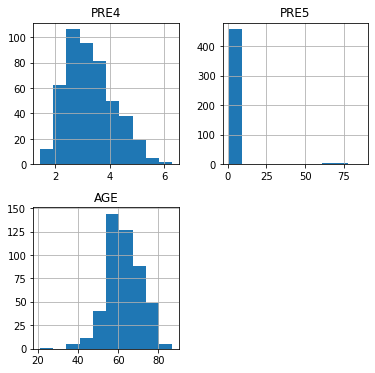

In [22]:
# Visualizing the distributions of the continuous variables

fig = plt.figure(figsize = (6, 6))
ax = fig.gca()
df[['PRE4','PRE5','AGE']].hist(ax = ax);

#### From the distributions above, it appears there are outliers in both the PRE5 and AGE features. We will now remove these outliers

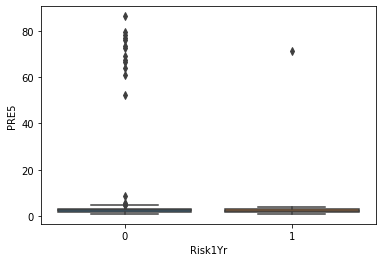

In [23]:
# Plotting PRE5 distribution of the majority and minority class -- outliers shown

ax = sns.boxplot(x="Risk1Yr", y="PRE5", data=df, showfliers=True)

In [67]:
df = df[np.abs(df.PRE5 - df.PRE5.mean()) <= (3*df.PRE5.std())]
df.shape

(451, 23)

In [68]:
df = df[np.abs(df.AGE - df.AGE.mean()) <= (3*df.AGE.std())]
df.shape

(450, 23)

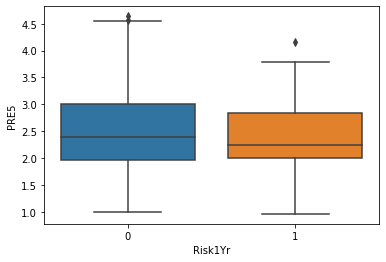

In [69]:
# Plotting PRE5 distribution of the majority and minority class -- outliers removed

ax = sns.boxplot(x="Risk1Yr", y="PRE5", data=df)

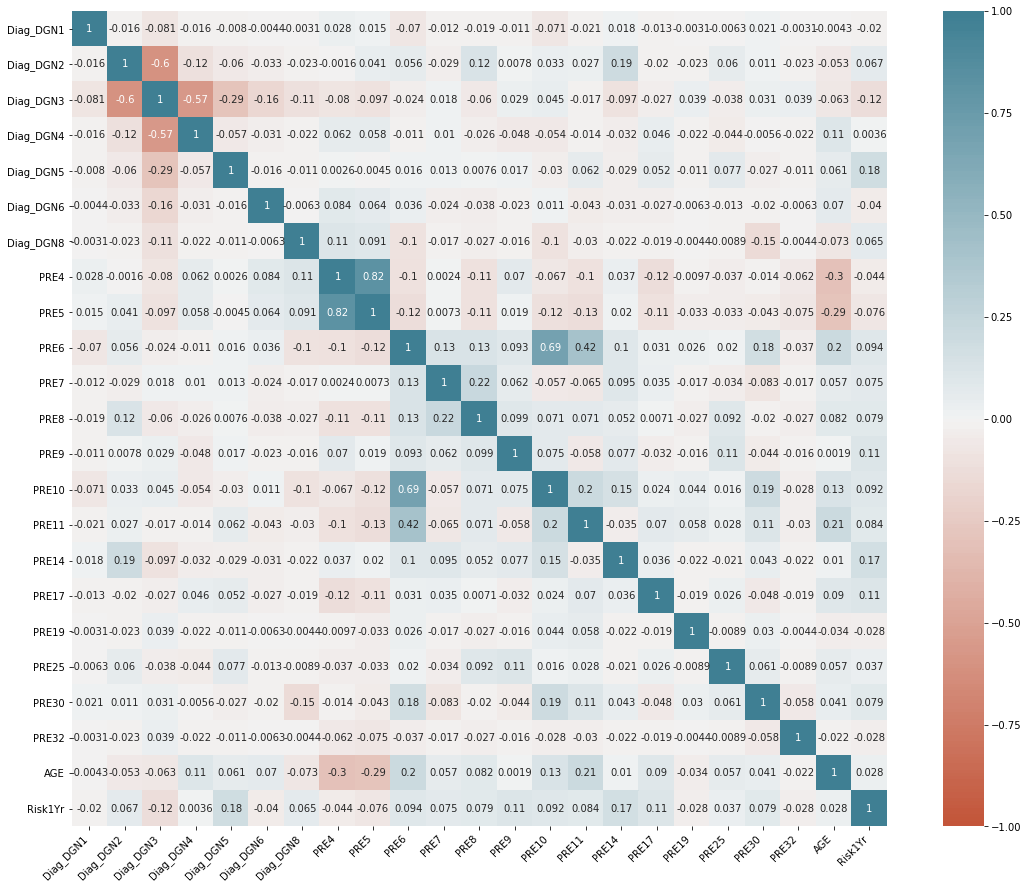

In [27]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### The Correlation Matrix shows several correlated features (both positively and negatively correlated) that will need to be taken
#### into consideration during feature selection. This include: Diag_DGN3, Diag_DGN4, PRE4, PRE5, PRE6 & PRE10

# Multiple Correspondence Analysis for Categorical Data

In [28]:
categorical_cols = ['PRE6','PRE14','PRE25']

cat_df = pd.get_dummies(df, columns = categorical_cols)
cat_df = cat_df.drop(['Diag_DGN1', 'Diag_DGN2', 'Diag_DGN3', 'Diag_DGN4', 'Diag_DGN5',
       'Diag_DGN6', 'Diag_DGN8','AGE','PRE4','PRE5','Risk1Yr','PRE7', 'PRE8', 'PRE9',
                     'PRE17','PRE19','PRE10','PRE11','PRE30', 'PRE32'], axis=1)
cat_df.head(8)

,PRE6_0,PRE6_1,PRE6_2,PRE14_0,PRE14_1,PRE14_2,PRE14_3,PRE25_0,PRE25_1
0,0,1,0,0,0,0,1,1,0
1,1,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,1,0
3,1,0,0,1,0,0,0,1,0
4,0,0,1,1,0,0,0,1,0
5,0,1,0,1,0,0,0,1,0
6,0,1,0,0,1,0,0,1,0
7,0,1,0,1,0,0,0,0,1


In [29]:
# Checking the categorical data's shape

cat_df.shape

(455, 9)

In [30]:
# Verifying all features are binary

cat_df.nunique()

PRE6_0     2
PRE6_1     2
PRE6_2     2
PRE14_0    2
PRE14_1    2
PRE14_2    2
PRE14_3    2
PRE25_0    2
PRE25_1    2
dtype: int64

In [31]:
from prince import MCA

In [32]:
# Running MCA

mca = MCA(n_components = 2, n_iter = 'auto', copy=True, check_input=True, random_state = 51)
mca.fit(cat_df)
mca.transform(cat_df)

,0,1
0,1.226138,0.886986
1,-0.225846,-0.605744
2,0.114488,-0.118541
3,0.304725,-1.051260
4,1.771013,-0.055146
...,...,...
465,0.355992,1.755084
466,0.304725,-1.051260
467,0.355992,1.755084
468,-0.416083,0.326975


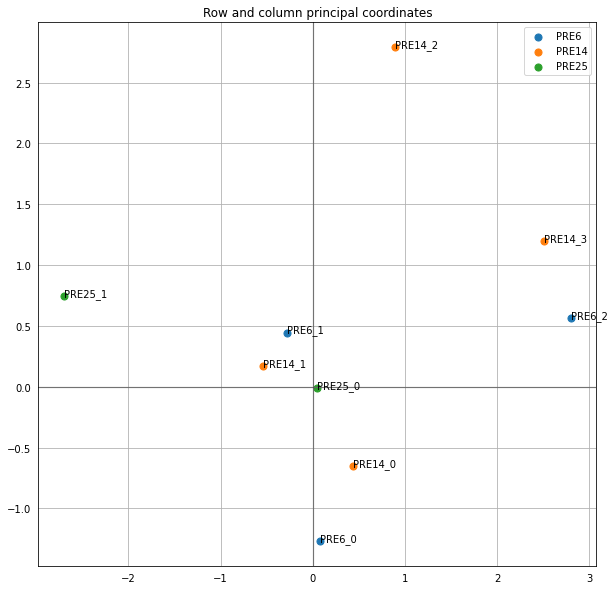

In [33]:
# Plotting components

try:

    ax = mca.plot_coordinates(
         X=cat_df,
         ax=None,
         figsize=(10, 10),
         show_row_points=False,
         row_points_size=8,
         show_row_labels=False,
         show_column_points=True,
         column_points_size=50,
         show_column_labels=True,
         legend_n_cols=1
 )

except: 
    
    ZeroDivisionError

In [34]:
mca.eigenvalues_

[0.3836207769885041, 0.37504759190877185]

In [35]:
mca.total_inertia_

0.0

In [36]:
mca.explained_inertia_

ZeroDivisionError: float division by zero

# Weighted Logistic Regression

Creating a baseline model using weighted logistic regression that will better handle the imbalanced classes in the dataset.

In [70]:
# Import model and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [71]:
# Split the dataset into X and y

df.reset_index(drop=True, inplace=True)

X = df.drop(['Risk1Yr'] ,axis=1)
y = df['Risk1Yr']

In [72]:
# Train Test Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Checking shape of the train and testing sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(360, 22)
(360,)
(90, 22)
(90,)


In [74]:
# Scale on the training set and apply transform to the test set

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We will first start by using the default Logistic Regression Model with no added weights and all features to establish a baseline.

In [75]:
# Define our model

lg1 = LogisticRegression(random_state=42, class_weight=None)

# Fit it

lg1.fit(X_train_scaled,y_train)

# Test

y_pred = lg1.predict(X_test_scaled)

In [76]:
# model performance

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8111111111111111
Confusion Matrix: 
[[71  5]
 [12  2]]
Area Under Curve: 0.5385338345864662
Recall score: 0.14285714285714285


The confusion matrix tells us that our model predicted on 90 observations contained within the test set. 
Of these, it predicted 83 'survived post-surgery' and predicted 7 'did not survive'
In actuality, 76 'survived post-surgery' and 14 'did not survive'

Since we're wanting to limit the number of False Negatives, we will look to optimize our model's Recall Score

In [77]:
# Split the dataset into X and y

df.reset_index(drop=True, inplace=True)

X = df.drop(['Risk1Yr','PRE4','PRE5','PRE6','PRE10'] ,axis=1)
y = df['Risk1Yr']

In [78]:
# Train Test Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Scale on the training set and apply transform to the test set

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# As a first step, we will try a weighted model w/ weights that reflect
# the imbalance in our dataset (85/15 split in majority/minority classes)
# define class weights
w = {0:15, 1:85}

# define model
lg2 = LogisticRegression(random_state=42, class_weight=w)

# fit it
lg2.fit(X_train_scaled,y_train)

# test
y_pred = lg2.predict(X_test_scaled)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7333333333333333
Confusion Matrix: 
[[58 18]
 [ 6  8]]
Area Under Curve: 0.6672932330827068
Recall score: 0.5714285714285714


#### From this initial weighting we can see that accuracy decreased, however, recall dramatically improved over the baseline model. 

Of the 14 instances included in our test set where the patient did not survive post surgery, our model improved by correctly identifying 8 and misclassifying 6. 

We'll next try GridSearch to cycle through various weights to determine an optimal weighting for our logistic regression model

In [81]:
# define weight hyperparameter

w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
     
hyperparam_grid = {"class_weight": w }

In [82]:
# define model

lg3 = LogisticRegression(random_state=42, class_weight=w)

In [83]:
# define evaluation procedure

grid = GridSearchCV(lg3, hyperparam_grid, scoring="recall", cv=10, n_jobs=-1, refit=True)
grid.fit(X_train_scaled,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 1.0 with param: {'class_weight': {0: 0.01, 1: 10}}


In [84]:
# We will now use the weights from the grid search to see how it effects model performance

w = {0:0.01, 1:10}

# define model
lg3 = LogisticRegression(random_state=42, class_weight=w)

# fit it
lg3.fit(X_train_scaled,y_train)

# test
y_pred = lg3.predict(X_test_scaled)

# define evaluation procedure

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model

scores = cross_val_score(lg3, X, y, scoring='recall', cv=cv, n_jobs=-1)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.15555555555555556
Confusion Matrix: 
[[ 0 76]
 [ 0 14]]
Area Under Curve: 0.5
Recall score: 1.0


# Testing Decision Tree Model

Because decision tree models split on a single yes/no decision node, it is not necessary to normalize the dataset prior to fitting to the model. For this reason they are popular choices

In [85]:
# Start by creating X and y using all features 

df.reset_index(drop=True, inplace=True)

X = df.drop(['Risk1Yr','PRE4','PRE5','PRE6','PRE10'] ,axis=1)
y = df['Risk1Yr']

In [86]:
# Split the data into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Check shape to make sure data was split properly

print( X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(360, 18) (360,)
(90, 18) (90,)


In [88]:
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'

gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=42)

# Call fit() on the gini_model as you did with the entr_model

gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 

y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before

pd.Series(y_pred)

# Check out gini_model

gini_model

DecisionTreeClassifier(random_state=42)

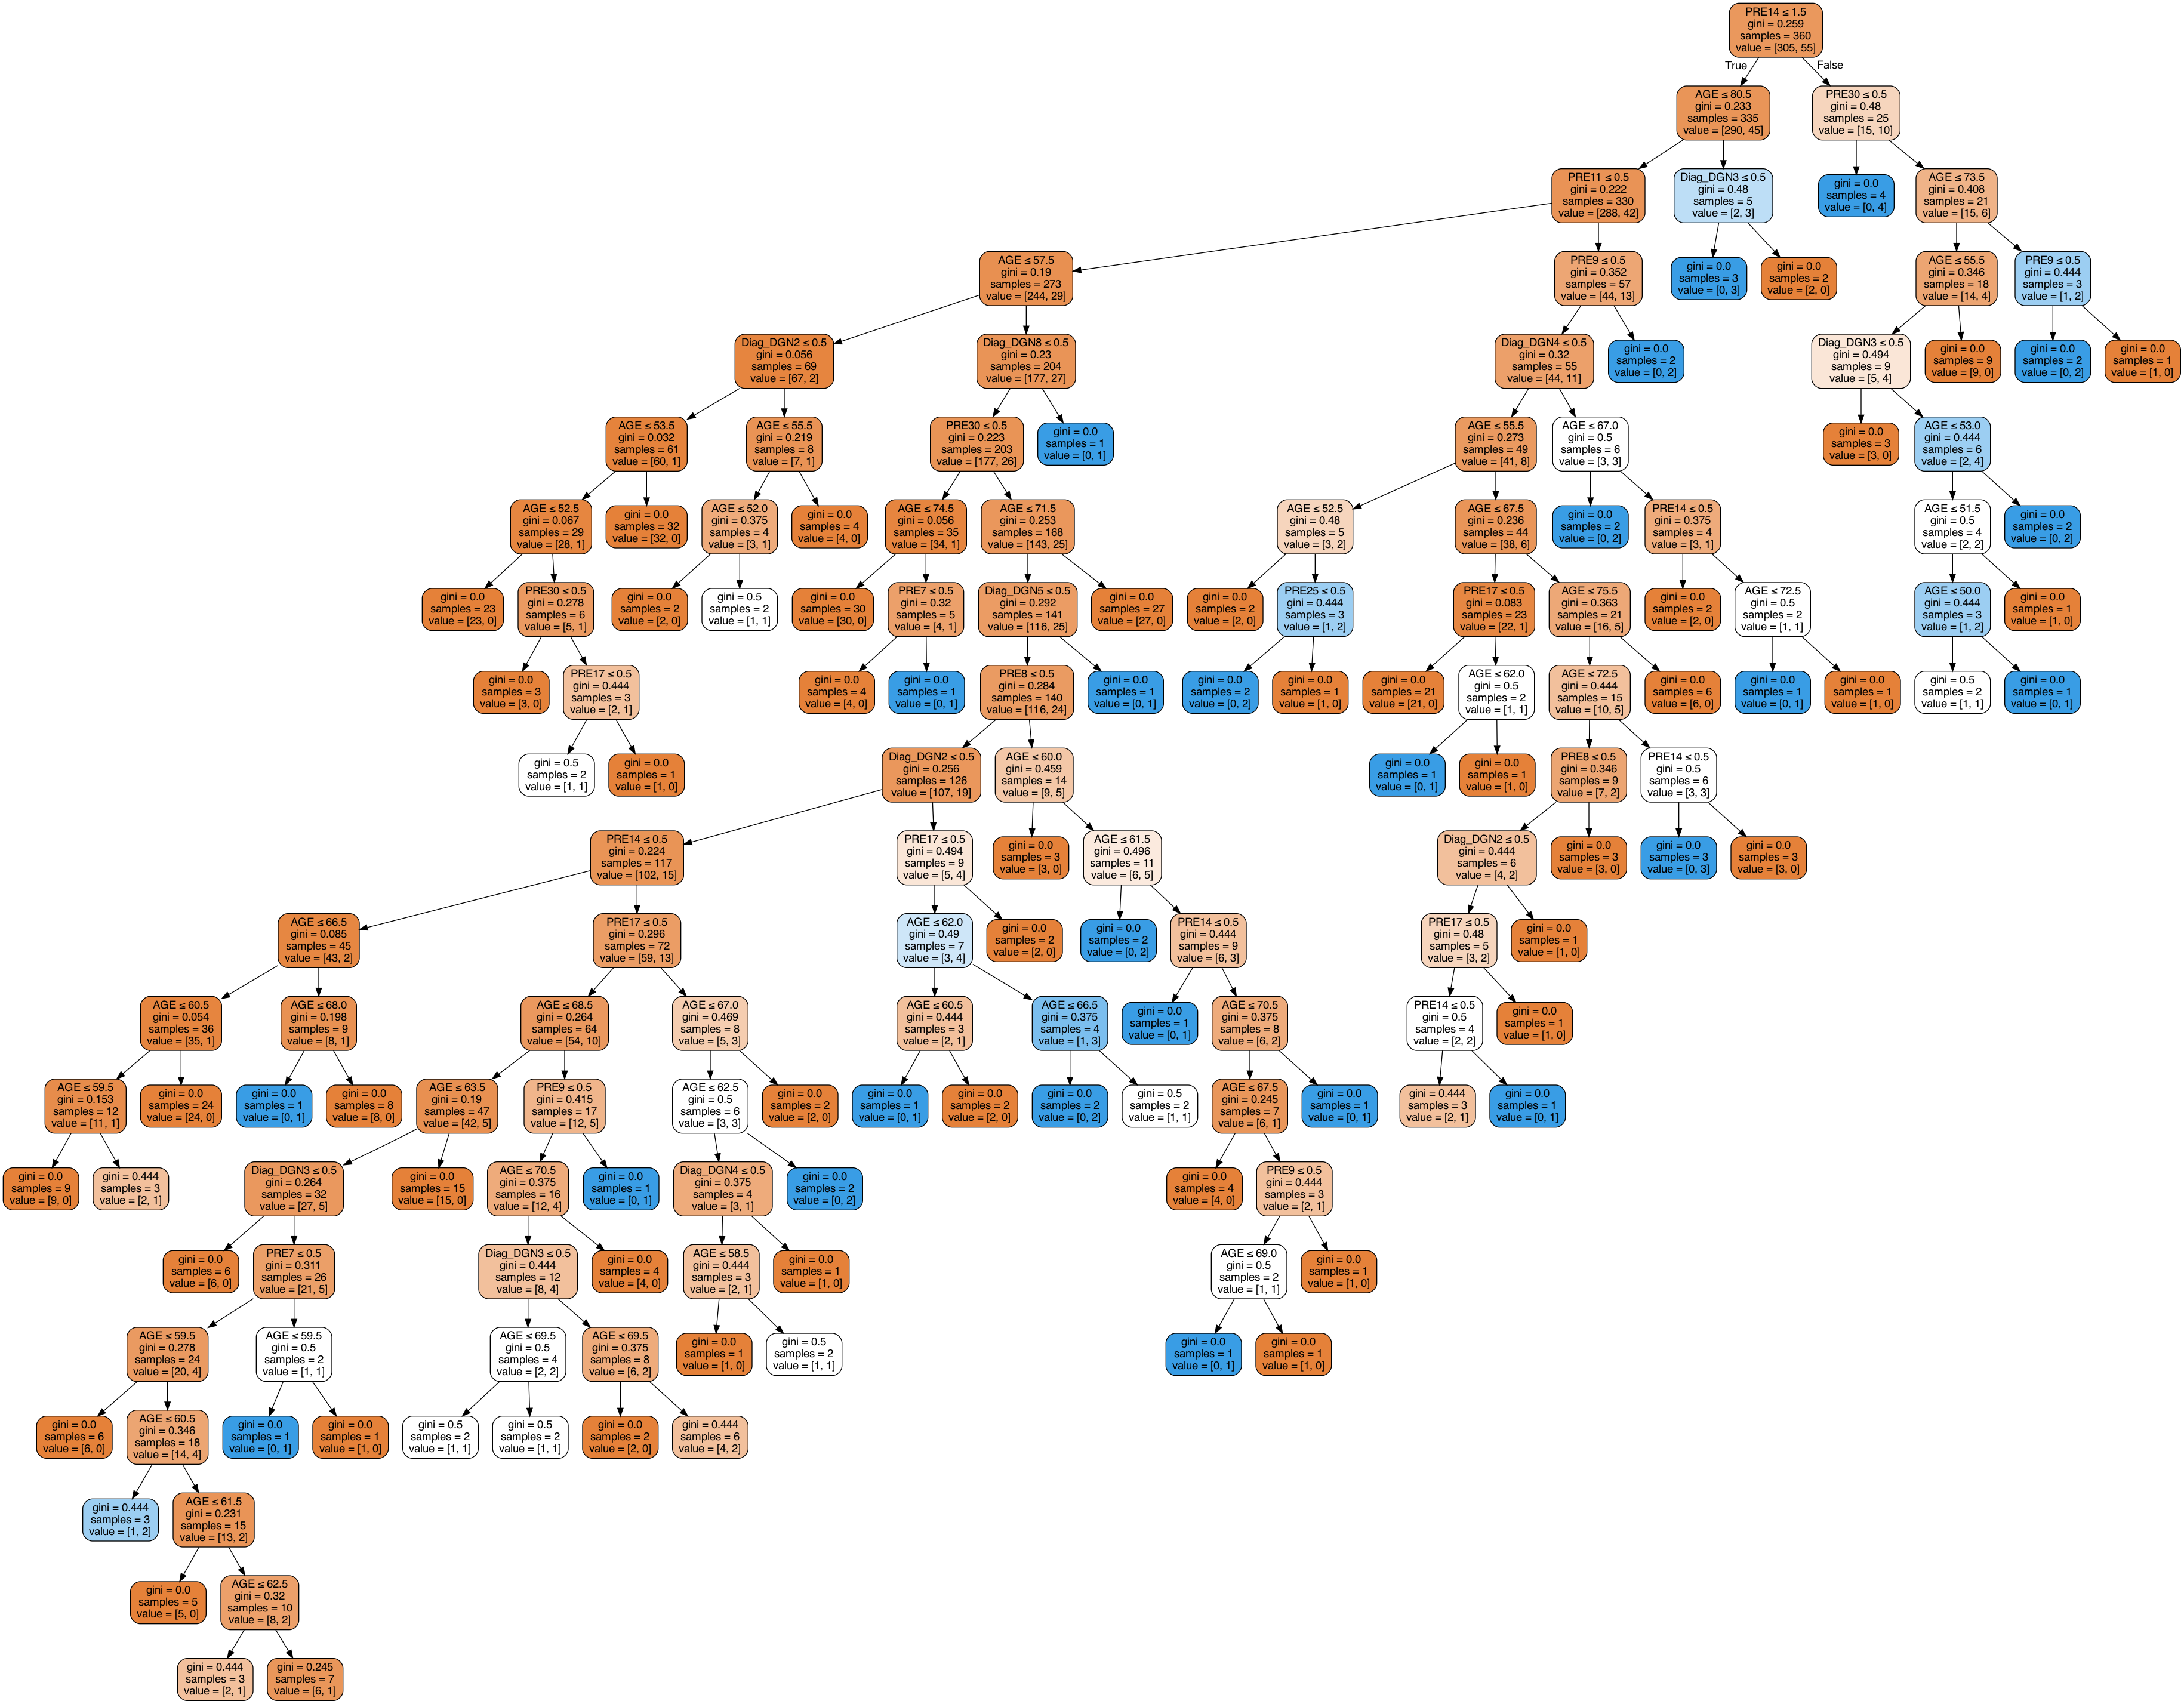

In [89]:

dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns)

# Alternatively for class_names use gini_model.classes_

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [90]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label=1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label=1))

Model Gini impurity model
Accuracy: 0.7555555555555555
Balanced accuracy: 0.4765037593984962
Precision score 0.1
Recall score 0.07142857142857142


[0.         0.02752429 0.06369872 0.01802966 0.01782584 0.
 0.01978343 0.02628468 0.01984123 0.06793482 0.01830655 0.12391098
 0.04370814 0.         0.01743372 0.0601388  0.         0.47557914]


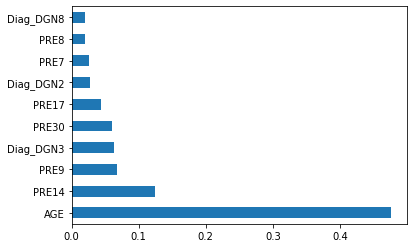

In [91]:
# use inbuilt class feature_importances of tree based classifiers
# adapted from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

print(gini_model.feature_importances_) 

# plot graph of feature importances for better visualization

feat_importances = pd.Series(gini_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Using all features and no max_depth led to an overly complicated tree, with very low recall and overfitting of the data

In [92]:
X = df[['PRE7', 'PRE8','PRE9','PRE11','PRE14','PRE17','PRE19','PRE25','PRE30','PRE32','AGE']]
y = df['Risk1Yr']

In [93]:
# Importing imbalanced learner for oversampling

import imblearn
from collections import Counter

print(imblearn.__version__)

0.7.0


In [94]:
# Oversample imbalanced dataset with SMOTE

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transform the dataset

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution

counter = Counter(y)
print(counter)

Counter({0: 381, 1: 381})


In [95]:
# Split the data into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gini Model w/ Max Depth = 5

gini_model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=42)

# Do the fit, predict, and series transformations as before. 

gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(max_depth=5, random_state=42)

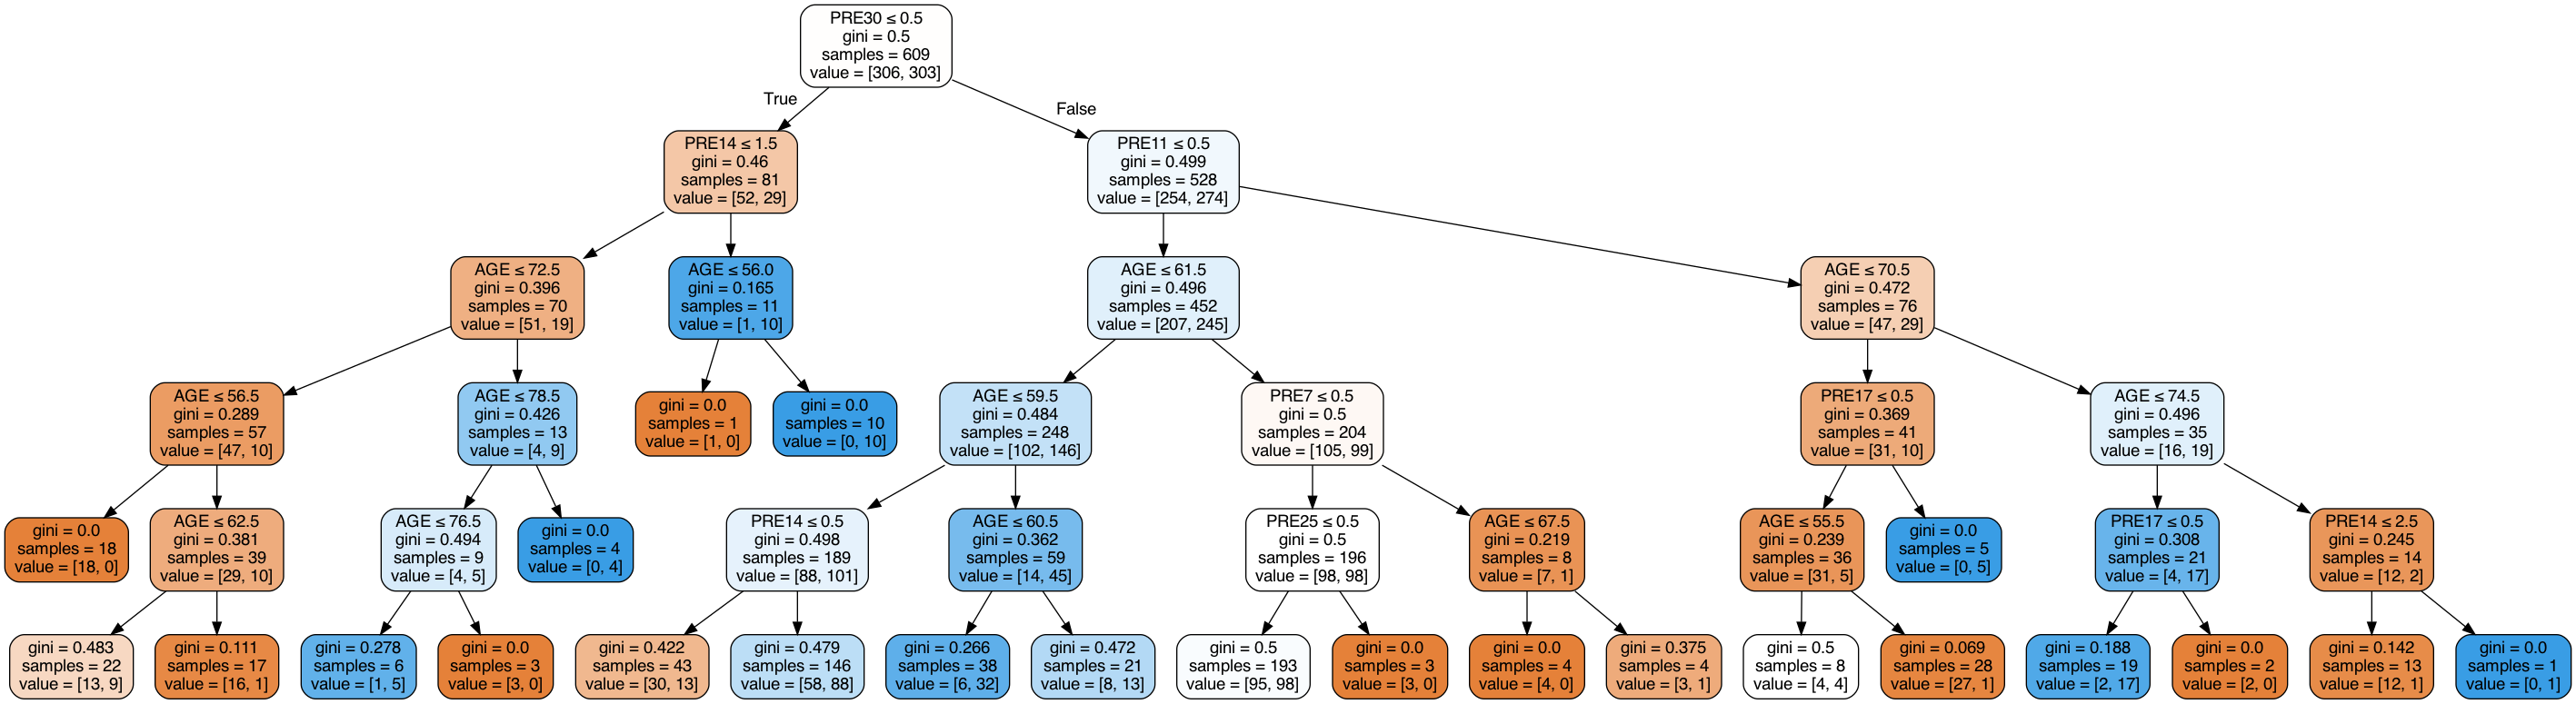

In [96]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns)

# Alternatively for class_names use gini_model2.classes_

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [97]:
print("Gini impurity  model - max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 1))

Gini impurity  model - max depth 5
Accuracy: 0.6143790849673203
Balanced accuracy: 0.6102564102564103
Precision score 0.5871559633027523
Recall score 0.8205128205128205


[0.02964997 0.         0.         0.04594924 0.20996792 0.12903782
 0.         0.02089324 0.04988144 0.         0.51462037]


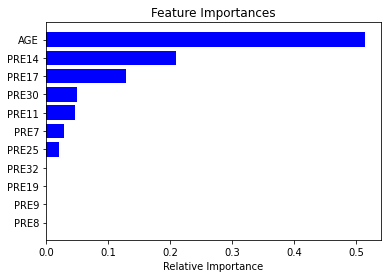

In [98]:
print(gini_model2.feature_importances_)

importances = gini_model2.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [99]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


gini_model2.predict_proba(data_for_prediction_array)

array([[0.59090909, 0.40909091]])

In [100]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(gini_model2)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [101]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

# Random Forrest Classifier

In [59]:
# Define X , y

X = df.drop(columns = ['Risk1Yr', 'Diag_DGN1', 'Diag_DGN2', 'Diag_DGN3','Diag_DGN4',
            'Diag_DGN5', 'Diag_DGN6','Diag_DGN8'])
y = df.Risk1Yr

# Summarize class distribution

from collections import Counter

counter = Counter(y)
print(counter)

Counter({0: 386, 1: 69})


In [60]:
# Importing imbalanced learner for oversampling

import imblearn
print(imblearn.__version__)

0.7.0


In [61]:
# Oversample imbalanced dataset with SMOTE

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transform the dataset

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution

counter = Counter(y)
print(counter)

Counter({0: 386, 1: 386})


In [62]:
# Split the data into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(max_depth=5, random_state=42)

# Model and fit

RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)

print("Random Forest Model - max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 1))

Random Forest Model - max depth 5
Accuracy: 0.6645161290322581
Balanced accuracy: 0.6773977196512408
Precision score 0.5959595959595959
Recall score 0.8309859154929577


In [64]:
# Checking the Actual and Predicted values to verify that no positive labels were predicted

print(np.unique(y_pred), np.unique(y_test))

[0 1] [0 1]


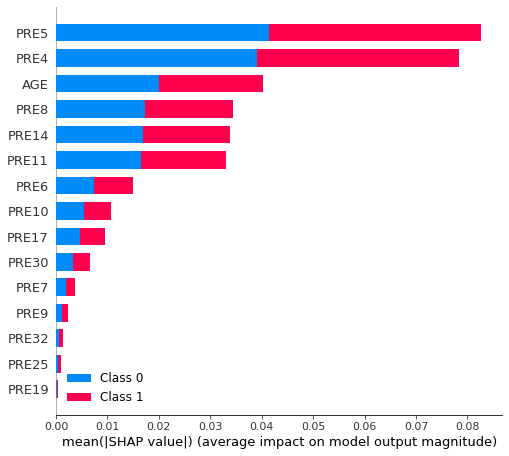

In [65]:
import shap
shap_values = shap.TreeExplainer(RFModel).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")